# 1- Perkenalan / Introduction

```
Nama        : Rio Ardiarta Makhiyyuddin

Dataset     : https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset

Objective   : From this project i will focus to predict the covid-19 patients from chest X-ray images using convolutional neural network in image classification using Tensorflow library and Keras. From this data we will classify x-ray who get infected from covid-19, normal and Pneumonia.
```

# 2- Import Libraries

In [ ]:
# Import libraries

import os
import cv2
import glob
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Input

from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Enable Mixed Precision training fof faster process
tf.keras.mixed_precision.set_global_policy('mixed_float16')

In [ ]:
# Install Kaggle library in Google Collaboratory

## Install Kaggle library
!pip install kaggle

## Make a directory named `.kaggle`
!mkdir ~/.kaggle

## Copy the kaggle.json into this new directory
!cp kaggle.json ~/.kaggle/

## Change permission for this directory :
!chmod 600 ~/.kaggle/kaggle.json

# 3- Data Loading

In [ ]:
%%time
# Download Dataset
# Source dataset : https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset

!kaggle datasets download -d pranavraikokte/covid19-image-dataset

 92% 145M/158M [00:00<00:00, 166MB/s]
100% 158M/158M [00:01<00:00, 158MB/s]
CPU times: user 25.2 ms, sys: 3.52 ms, total: 28.7 ms
Wall time: 1.91 s


In [ ]:
# Every dataset that downloaded from Kaggle, is in format `.zip`. So, we must unzip it before we can using the dataset.

!unzip ./covid19-image-dataset.zip

Archive:  ./covid19-image-dataset.zip
  inflating: Covid19-dataset/test/Covid/0100.jpeg  
  inflating: Covid19-dataset/test/Covid/0102.jpeg  
  inflating: Covid19-dataset/test/Covid/0105.png  
  inflating: Covid19-dataset/test/Covid/0106.jpeg  
  inflating: Covid19-dataset/test/Covid/0108.jpeg  
  inflating: Covid19-dataset/test/Covid/0111.jpg  
  inflating: Covid19-dataset/test/Covid/0112.jpg  
  inflating: Covid19-dataset/test/Covid/0113.jpg  
  inflating: Covid19-dataset/test/Covid/0115.jpeg  
  inflating: Covid19-dataset/test/Covid/0118.jpeg  
  inflating: Covid19-dataset/test/Covid/0119.jpeg  
  inflating: Covid19-dataset/test/Covid/0120.jpg  
  inflating: Covid19-dataset/test/Covid/094.png  
  inflating: Covid19-dataset/test/Covid/096.png  
  inflating: Covid19-dataset/test/Covid/098.jpeg  
  inflating: Covid19-dataset/test/Covid/COVID-00003b.jpg  
  inflating: Covid19-dataset/test/Covid/COVID-00012.jpg  
  inflating: Covid19-dataset/test/Covid/COVID-00022.jpg  
  inflating: Covi

In [ ]:
# # Load Data
# os.listdir('/content/drive/MyDrive/covid19_dataset')

In [ ]:
# Created a path for dataset
main_path = '/content/Covid19-dataset'
train_dir = os.path.join(main_path, 'train')  # path for train
test_dir = os.path.join(main_path, 'test')    # path for test

In [ ]:
# create variables train, test each for each class

#train
train_normal = len(os.listdir(os.path.join(train_dir, 'Normal')))
train_covid = len(os.listdir(os.path.join(train_dir, 'Covid')))
train_viral = len(os.listdir(os.path.join(train_dir, 'Viral Pneumonia')))

#test
test_normal = len(os.listdir(os.path.join(test_dir, 'Normal')))
test_covid = len(os.listdir(os.path.join(test_dir, 'Covid')))
test_viral = len(os.listdir(os.path.join(test_dir, 'Viral Pneumonia')))


# data count
print('----------------')
print('Train Dataset')
print('----------------')
print('Count of train_normal : ', train_normal)
print('Count of train_covid : ', train_covid)
print('Count of train_viral: ', train_viral)
print(' ')
print('----------------')
print('Test Dataset')
print('----------------')
print('Count of test_normal : ', test_normal)
print('Count of test_covid : ', test_covid)
print('Count of test_viral: ', test_viral)

----------------
Train Dataset
----------------
Count of train_normal :  70
Count of train_covid :  111
Count of train_viral:  70
 
----------------
Test Dataset
----------------
Count of test_normal :  20
Count of test_covid :  26
Count of test_viral:  20


In [ ]:
# Create a variable from filepaths

#train
train_normal = glob.glob(train_dir + '/Normal/*.jpeg')
train_covid = glob.glob(train_dir + '/Covid/*.jpeg')
train_viral = glob.glob(train_dir + '/Viral Pneumonia/*.jpeg')


#test
test_normal = glob.glob(test_dir + '/Normal/*.jpeg')
test_covid = glob.glob(test_dir + '/Covid/*.jpeg')
test_viral = glob.glob(test_dir + '/Viral Pneumonia/*.jpeg')

In [ ]:
# Creating dataset train and test

def create_dataframe(list_of_images):
  data=[]
  for image in list_of_images:
    data.append((image, image.split('/')[-2]))

  return pd.DataFrame(data, columns= ['images', 'label'])

train_df = create_dataframe(train_normal + train_covid + train_viral)
train_df = train_df.sample(frac=1, random_state=10).reset_index(drop=True)

test_df = create_dataframe(test_normal + test_covid + test_viral)
test_df = test_df.sample(frac=1, random_state=10).reset_index(drop=True)

In [ ]:
# Show shape of sampel from train set
print(train_df.shape)
train_df

(186, 2)


,images,label
0,/content/Covid19-dataset/train/Normal/019.jpeg,Normal
1,/content/Covid19-dataset/train/Viral Pneumonia...,Viral Pneumonia
2,/content/Covid19-dataset/train/Normal/079.jpeg,Normal
3,/content/Covid19-dataset/train/Covid/08.jpeg,Covid
4,/content/Covid19-dataset/train/Covid/03.jpeg,Covid
...,...,...
181,/content/Covid19-dataset/train/Covid/084.jpeg,Covid
182,/content/Covid19-dataset/train/Normal/072.jpeg,Normal
183,/content/Covid19-dataset/train/Normal/011.jpeg,Normal
184,/content/Covid19-dataset/train/Viral Pneumonia...,Viral Pneumonia


# 4- Exploraty Data Analysis

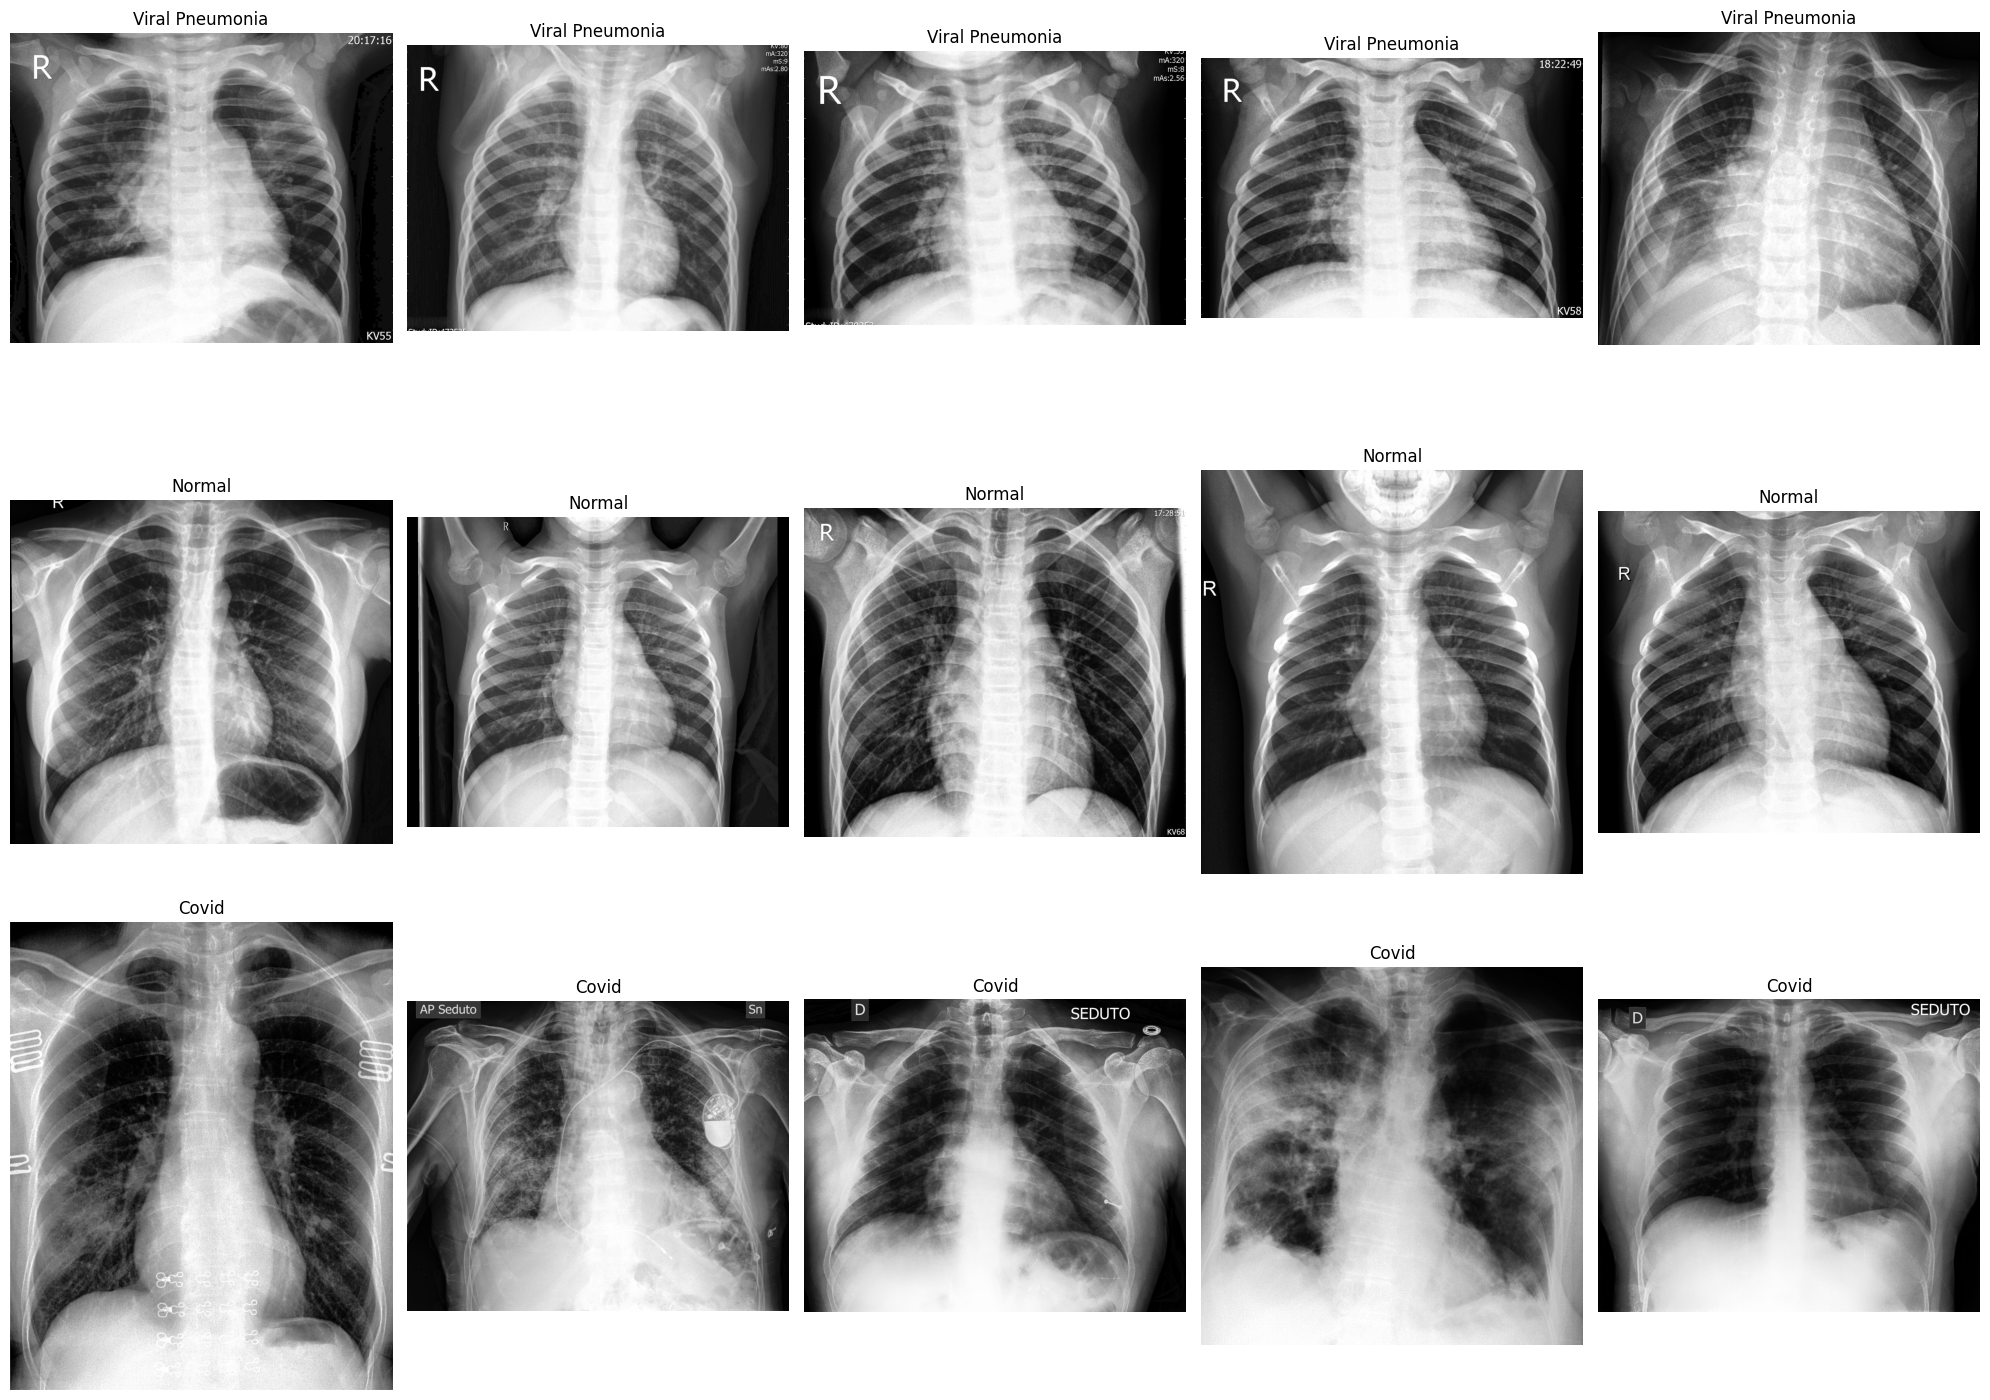

In [ ]:
# Sample data (replace this with your actual data)
pneumonia_samples = train_df[train_df['label'] == 'Viral Pneumonia']['images'].iloc[:5].tolist()
normal_samples = train_df[train_df['label'] == 'Normal']['images'].iloc[:5].tolist()
covid_samples = train_df[train_df['label'] == 'Covid']['images'].iloc[:5].tolist()

# Function to visualize sample images
def visualize_samples(samples, labels):
    fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(20, 15))
    for i, (sample, label) in enumerate(zip(samples, labels)):
        img = cv2.imread(sample)
        ax[i // 5, i % 5].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax[i // 5, i % 5].set_title(label, fontsize=12)  # Set label as title
        ax[i // 5, i % 5].axis('off')  # Turn off axis
    plt.tight_layout()  # Adjust layout
    plt.show()

# Sample labels
pneumonia_labels = ['Viral Pneumonia'] * 5
normal_labels = ['Normal'] * 5
covid_labels = ['Covid'] * 5

# Execute the function
visualize_samples(pneumonia_samples + normal_samples + covid_samples,
                   pneumonia_labels + normal_labels + covid_labels)

**Statement**

- Covid : Covid-19 affect lungs organs and also have a wide impack to organs, the most commong sickness are cough, shortness of breath, fever and sore throat.

- Normal : Hollow structures containing mostly air, such as the lungs, normally appear dark. In a normal chest X-ray, the chest cavity is outlined on each side by the white bone structures that represent the ribs of the chest wall. On the top portion of the chest are the neck and the collar bones (clavicles) (emedicinehealt.com).

- Viral Pneumonia : Common radiographic features in viral pneumonia include bilateral patchy consolidation, lobar consolidation, diffuse areas of air space consolidation or interstitial lung disease.


# 5- Feature Engineering

## 5.1- Resize

In [ ]:
# Define hyperparameters

img_height= 220
img_width= 220
batch_size= 20

## 5.2- Split Train, Test, & Validation

In [ ]:
# Clear session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# Create batch generator for train-set, val-set, and test-set with Augmentation

train_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.,
                                                                    rotation_range=20,
                                                                    zoom_range=0.05,
                                                                    width_shift_range=0.05,
                                                                    height_shift_range=0.05,
                                                                    shear_range=0.05,
                                                                    horizontal_flip=True,
                                                                    validation_split=0.4)

train_set_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                      target_size=(img_height,img_width),
                                                      class_mode='sparse',
                                                      subset='training',
                                                      batch_size=batch_size,
                                                      shuffle=True,
                                                      seed=2)

val_set_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                    target_size=(img_height,img_width),
                                                    class_mode='sparse',
                                                    subset='validation',
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    seed=2)

test_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

test_set_aug = test_datagen_aug.flow_from_directory(test_dir,
                                                    target_size=(img_height,img_width),
                                                    class_mode='sparse',
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    seed=2)

Found 151 images belonging to 3 classes.
Found 100 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [ ]:
# Show labels

train_set_aug.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [ ]:
class_names = list(train_set_aug.class_indices.keys())
print(class_names)

['Covid', 'Normal', 'Viral Pneumonia']


**Statement :**

- Target size : The size of the target image 220x220 because it will be the most size for our model to predict.
- Class Mode : The class mode is categorical because we will use sparse categorical classification consist of (Normal, Pneumonia, Covid-19).
- Batch size : we use 20 because we just have small data and we dont need process run faster

# 6- ANN Training

On this section we will define base models for each convolutional neural network architecture that will be used. We will use the following architecture is Sequential Method

## 6.1- Model Definition

In [ ]:
# Create Sequential API model

# Model process
model_aug = Sequential()

# Convutional 1
model_aug.add(Conv2D(16, (3,3), activation='relu', input_shape=(img_height, img_width,3)))
model_aug.add(MaxPooling2D(2, 2))

# Convutional 2
model_aug.add(Conv2D(32, (3,3), activation='relu'))
model_aug.add(MaxPooling2D(2, 2))

# Convutional 3
model_aug.add(Conv2D(64, (3,3),activation='relu'))
model_aug.add(MaxPooling2D(2, 2))

# Flaten layer
model_aug.add(Flatten())

# Dropping 50% of the output from applied layer
model_aug.add(Dropout(0.5))

# Fully connected layer
model_aug.add(Dense(64, activation='relu'))

# Output 1
model_aug.add(Dense(3, activation='softmax'))

# Compile
model_aug.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# Summary
model_aug.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 218, 218, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 109, 109, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 107, 107, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 51, 51, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 25, 25, 64)        0

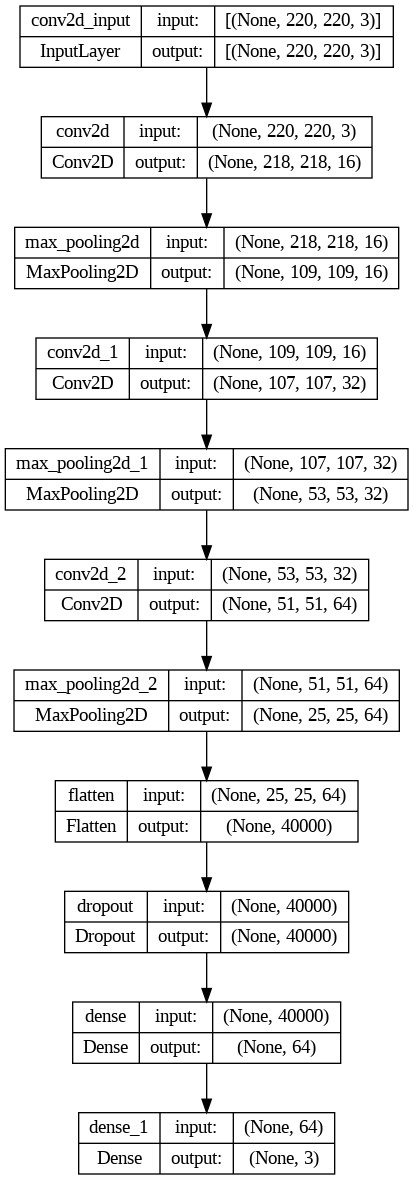

In [ ]:
# Plot layers

tf.keras.utils.plot_model(model_aug, show_shapes=True)

## 6.2- Model Training

In this training processing image model, set epoch on 20 as limitation. and i've tried to use batch size 20

In [ ]:
# Train the model

%%time
history_aug = model_aug.fit(train_set_aug, epochs=20, validation_data=val_set_aug, batch_size=batch_size)

Epoch 1/20
8/8 [==============================] - 16s 1s/step - loss: 0.9613 - accuracy: 0.4702 - val_loss: 0.6949 - val_accuracy: 0.7200
Epoch 2/20
8/8 [==============================] - 8s 1s/step - loss: 0.5661 - accuracy: 0.6821 - val_loss: 0.5233 - val_accuracy: 0.7300
Epoch 3/20
8/8 [==============================] - 8s 985ms/step - loss: 0.4863 - accuracy: 0.8079 - val_loss: 0.8827 - val_accuracy: 0.6600
Epoch 4/20
8/8 [==============================] - 8s 1s/step - loss: 0.5403 - accuracy: 0.7616 - val_loss: 0.3246 - val_accuracy: 0.8700
Epoch 5/20
8/8 [==============================] - 9s 1s/step - loss: 0.3676 - accuracy: 0.8411 - val_loss: 0.3612 - val_accuracy: 0.8700
Epoch 6/20
8/8 [==============================] - 7s 933ms/step - loss: 0.2834 - accuracy: 0.9007 - val_loss: 0.3403 - val_accuracy: 0.8700
Epoch 7/20
8/8 [==============================] - 8s 1s/step - loss: 0.2329 - accuracy: 0.9073 - val_loss: 0.3981 - val_accuracy: 0.8500
Epoch 8/20
8/8 [==================

## 6.3- Model Evaluation

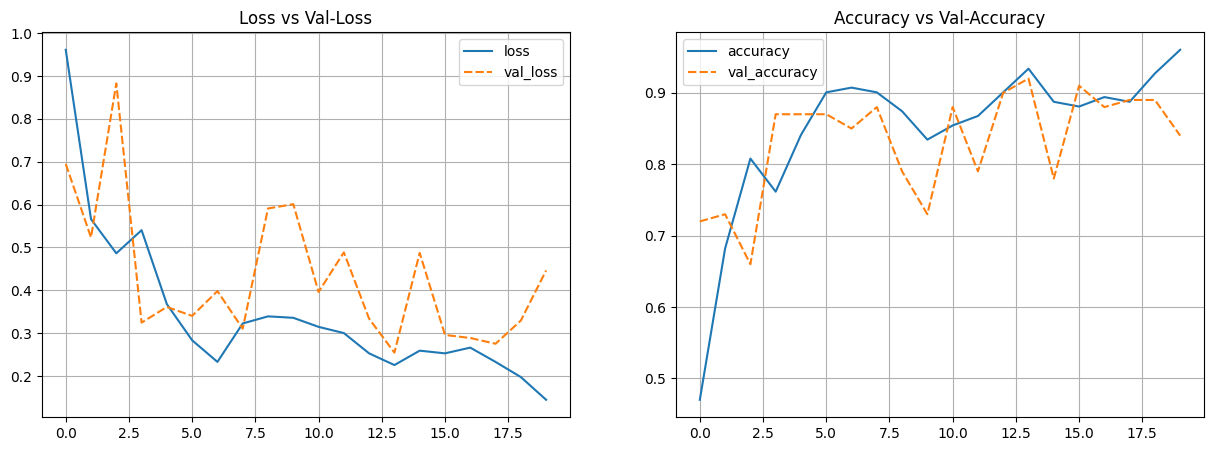

In [ ]:
# Plot training results

history_aug_df = pd.DataFrame(history_aug.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_aug_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_aug_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

**Statement**

As we can see from our base model, we have the result very bad val_accuracy and val_loss get exploded because of the data that we have. However the train line get smooth or enough stable performance, cause we have some almost good fitting and little exploded performance on early epoch, we need to make our model more accuracte and stable for validation result with adding some parameters that we will try to use.

From the graph above as we figure our model can be read and we can conclude this model has good performance/ good fitting

In [ ]:
# Check the performance of test-set

## Get the probability
y_pred_prob_aug = model_aug.predict_generator(test_set_aug)

## Get class with maximum probability
y_pred_class_aug = np.argmax(y_pred_prob_aug, axis=-1)

## Display Classification Report
print(classification_report(test_set_aug.classes, y_pred_class_aug, target_names=np.array(list(train_set_aug.class_indices.keys()))))

                 precision    recall  f1-score   support

          Covid       1.00      0.92      0.96        26
         Normal       0.77      0.85      0.81        20
Viral Pneumonia       0.80      0.80      0.80        20

       accuracy                           0.86        66
      macro avg       0.86      0.86      0.86        66
   weighted avg       0.87      0.86      0.87        66



**Statement**

Based on classification report, our model perform very well for predicting all classes, and has the result with average 85-92% on recall for class 'Covid' & 'Normal' and 80% for class Viral Pneumonia. and has accuracy for 86%. We got good result because we have balance data for training our model.

# 7- ANN Improvement

In this sub-section we will try improve the model by adding more layers and add parameters that will reduce val_loss and increase accuracy.


**Model Improvement**

In this model improvement we will changing some parameters that will make our model has stable performance and improve accuracy and reduce loss value.

so we need to plan our architecture model improvement, and the information here:

Add some parameters to reduce overfitting and decline exploding

- Each Keras Application expects a specific kind of input preprocessing. For VGG16, call `keras.applications.vgg16.preprocess_input` on your inputs before passing them to the model. `vgg16.preprocess_input` will convert the input images from RGB to BGR, then will zero-center each color channel with respect to the ImageNet dataset, without scaling.

In [ ]:
# Download pretrained model

from keras.applications.vgg16 import VGG16, preprocess_input

pretrained_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height,img_width, 3))
pretrained_model.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


## 7.1- Model Defination

In [ ]:
# Create Sequential API model

model_imp = Sequential()
model_imp.add(pretrained_model)
model_imp.add(Flatten())
model_imp.add(Dense(512, activation='relu'))
model_imp.add(Dense(256, activation='relu'))
model_imp.add(Dense(6, activation='softmax'))

# Compile
model_imp.compile(loss='sparse_categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])
model_imp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 18432)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               9437696   
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 24285254 (92.64 MB)
Trainable params: 9570566 (36.51 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


**Statement**

From the above results, we can see that the model function is to print a summary of the model architecture that has been created, showing the total number of parameters, trainable parameters, and non-trainable parameters of this model. The total number of parameters is 24.2 million, but only a small fraction can be optimized during training (9.5 million). This is because the majority of the parameters are already available from the pre-trained Adamax.

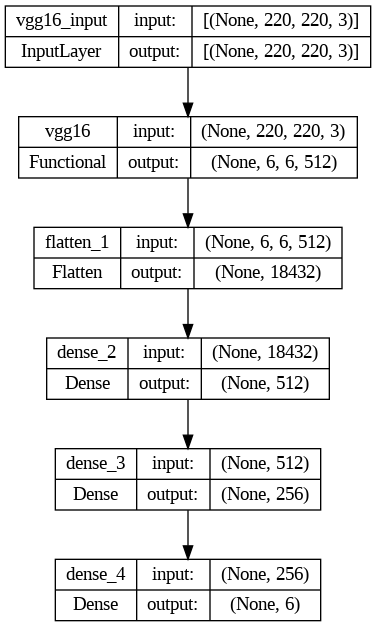

In [ ]:
# Plot layers

tf.keras.utils.plot_model(model_imp, show_shapes=True)

Some changes I tried to use to improve this model:
- In this improvement model using transfer learning
- Change the optimizer to **Adamax** as it is superior to Adam's
- Add 2 layers to the already fully connected layers
- Add ReLU as an activator model, as it is more stable and efficient and sensitive to x-ray image data.

## 7.2- Model Training

In this training processing image model, i set epoch on 25 as limitation. and i've tried to use batch size 20

In [ ]:
# Train the model

%%time
history_imp = model_imp.fit(train_set_aug, epochs=25, validation_data=val_set_aug, batch_size=batch_size)

Epoch 1/25
8/8 [==============================] - 22s 2s/step - loss: 1.8472 - accuracy: 0.4636 - val_loss: 0.9328 - val_accuracy: 0.5700
Epoch 2/25
8/8 [==============================] - 8s 1s/step - loss: 0.4580 - accuracy: 0.7947 - val_loss: 0.4942 - val_accuracy: 0.8000
Epoch 3/25
8/8 [==============================] - 7s 986ms/step - loss: 0.2824 - accuracy: 0.9139 - val_loss: 0.3217 - val_accuracy: 0.8900
Epoch 4/25
8/8 [==============================] - 8s 1s/step - loss: 0.2192 - accuracy: 0.8940 - val_loss: 0.2757 - val_accuracy: 0.9100
Epoch 5/25
8/8 [==============================] - 8s 1s/step - loss: 0.1625 - accuracy: 0.9470 - val_loss: 0.2807 - val_accuracy: 0.9000
Epoch 6/25
8/8 [==============================] - 18s 2s/step - loss: 0.1205 - accuracy: 0.9603 - val_loss: 0.3197 - val_accuracy: 0.8800
Epoch 7/25
8/8 [==============================] - 9s 1s/step - loss: 0.0843 - accuracy: 0.9735 - val_loss: 0.2137 - val_accuracy: 0.9200
Epoch 8/25
8/8 [====================

## 7.3- Model Evaluation

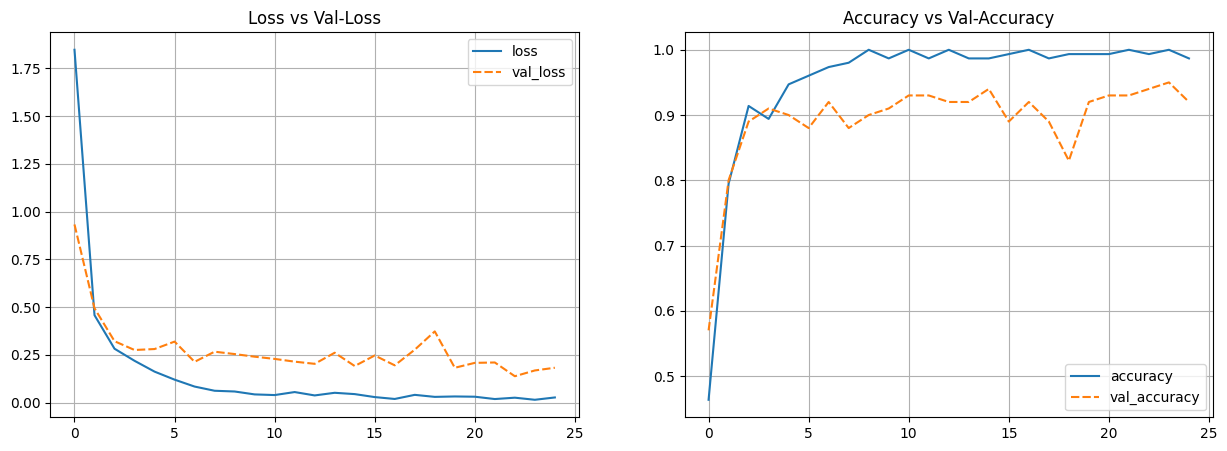

In [ ]:
# Plot training results

history_imp_df = pd.DataFrame(history_imp.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_imp_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_imp_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

**Statement**

From the model improvement results, we get better results on accuracy and loss value, we managed to make the validation almost get a stable performance with 90% accuracy and 15% loss value on the validation data, after all we got this model after a long trial and error process. Previously we only used 2 convolution layers but did not have good performance for our model.

In the loss score and accuracy graph, it starts to converge at the 4th epoch, after reaching the 8th epoch the model gets a stable performance on accuracy and loss score. We get these better results when we use 2 fully connected layers with 512 neurons for the first layer and for the second layer fully with 256 neurons.

In [ ]:
# Check the performance of test-set

## Get the probability
y_pred_prob_imp = model_imp.predict_generator(test_set_aug)

## Get class with maximum probability
y_pred_class_imp = np.argmax(y_pred_prob_imp, axis=-1)

## Display Classification Report
print(classification_report(test_set_aug.classes, y_pred_class_imp, target_names=np.array(list(train_set_aug.class_indices.keys()))))

                 precision    recall  f1-score   support

          Covid       1.00      1.00      1.00        26
         Normal       1.00      1.00      1.00        20
Viral Pneumonia       1.00      1.00      1.00        20

       accuracy                           1.00        66
      macro avg       1.00      1.00      1.00        66
   weighted avg       1.00      1.00      1.00        66



**Statement**

From the classification report that we get, we can conclude out model has better result from base model, which is our Model improvement has good predict on class 'Normal' with 100% recall and 100% f1-score with 100% accuracy as before from our base model, if we want to make our model better than this we can add more layers deeply to make our model has better performance. We got perfect score on precision on Class Covid eventho has the lowest recall score than other class, but we still use this model for prediction.

So, i decided to choose Sequential API Improved model as my final model.

# 8- Model Saving

The process of saving the model is important because training the model can take time and valuable resources, and by saving the model, you can quickly apply it to new data.

In [ ]:
model_imp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 18432)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               9437696   
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 24285254 (92.64 MB)
Trainable params: 9570566 (36.51 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
model_imp.trainable = False
model_imp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 18432)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               9437696   
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 24285254 (92.64 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 24285254 (92.64 MB)
_________________________________________________________________


In [ ]:
model_imp.save('model_imp.h5')

# 9- Model Inference

Model inference dibuat di notebook berbeda dengan nama **P2G7_rio_ardiarta_inf.ipynb**

# 10- Conclusion

**Exploraty Data Analysis**

- Our project has 3 classes namely Viral Pneumonia, Normal & Covid which have balanced data.
- All the datasets have different sizes so we resize them first to train the data to get better results.
- Our image data is a chest X-ray image, so we preprocessed it using augmentation, rotation, zoom range, width, height, shear as well as the horizontal flip.


**Model Analysis**

- For the improvement we used the `Adamax` model as transfer learning. the reason is because this model is more efficient for CNN type models.

- After we compared the base model and the improved model, we decided to use the improved model as the best model to predict even though both models have good accuracy scores and are still very suitable.

- Base model using with 2 convolution layers and 2 fully connected layer, while using ReLU as activation and softmax as output activation because it has multiclass labels, optimization using Adam because it is the most frequently used for base model. However, the results are quite good and not very good, but we get 91% accuracy and get 80-100% recall in all three classes.

- In this Improvement Model, we tried to train to add layers and add some parameters needed to reduce overfitting and reduce the loss value. Then when trying to use only 2 fully connected layers with 256 neurons and 512 neurons, using Adamax as optimization and get very better results than the basic mode with 100% accuracy and average recall at 100% and 100% f1-score. The 100% accuracy obtained is not very high because there is no complexity and deep layers in the model architecture, but still try to make a simple but effective model to get better results.

This model is suitable for companies/agencies making applications that want to detect whether someone has covid disease or pneumonia, in addition to being used for normal patients. So this model is very suitable for detecting from X-rays that are already owned by someone.